In [1]:
from contractions import contractions_dict

In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [3]:
def expand_contractions(text, contraction_map=None):
    if contraction_map is None:
        contraction_map = contractions_dict

    # Using regex for getting all contracted words
    contractions_keys = '|'.join(re.escape(key) for key in contraction_map.keys())
    contractions_pattern = re.compile(f'({contractions_keys})', flags=re.DOTALL)

    expanded_text = contractions_pattern.sub(lambda match: contraction_map.get(match.group(0), match.group(0)), text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

# Example usage
expand_contractions("y'all can't expand contractions i'd think")


'you all cannot expand contractions id think'

In [4]:
entertainment = pd.read_csv('data/BBCNewsSummaryCSV/entertainment_data.csv') 
sport = pd.read_csv('data/BBCNewsSummaryCSV/sport_data.csv')
tech = pd.read_csv('data/BBCNewsSummaryCSV/tech_data.csv')

In [5]:
print(entertainment.head())

            filename                                        newsarticle  \
0  entertainment_001  Gallery unveils interactive tree\n\nA Christma...   
1  entertainment_002  Jarre joins fairytale celebration\n\nFrench mu...   
2  entertainment_003  Musical treatment for Capra film\n\nThe classi...   
3  entertainment_004  Richard and Judy choose top books\n\nThe 10 au...   
4  entertainment_005  Poppins musical gets flying start\n\nThe stage...   

                                             summary  
0  The messages will be "unwrapped" by sculptor R...  
1  Bloom is to be formally presented with the Han...  
2  The classic film It's A Wonderful Life is to b...  
3  "It was very hard to follow last year's extrem...  
4  Mary Poppins was originally created by author ...  


In [6]:
training_dataset = pd.concat([entertainment,sport,tech], ignore_index=True)

In [7]:
training_dataset = training_dataset.sample(frac=1).reset_index(drop=True)

In [8]:
training_dataset.head()

,filename,newsarticle,summary
0,entertainment_097,Surprise win for anti-Bush film\n\nMichael Moo...,"Moore said it was ""an historic occasion"" that ..."
1,tech_329,Intel unveils laser breakthrough\n\nIntel has ...,While work has been done to make some of the c...
2,tech_352,Slow start to speedy net services\n\nFaster br...,"For BT Retail, she said, the super-fast servic..."
3,sport_461,Rusedski angry over supplements\n\nGreg Ruseds...,"""You would think they would have been availabl..."
4,tech_074,China 'to overtake US net use'\n\nThe Chinese ...,The net is key to helping Chinese people keep ...


In [9]:
def getSenLen(sentence):
    return len(sentence.split())

In [10]:
training_dataset['article_length'] = training_dataset['newsarticle'].apply(getSenLen)
training_dataset['summary_length'] = training_dataset['summary'].apply(getSenLen)

In [11]:
training_dataset

,filename,newsarticle,summary,article_length,summary_length
0,entertainment_097,Surprise win for anti-Bush film\n\nMichael Moo...,"Moore said it was ""an historic occasion"" that ...",309,138
1,tech_329,Intel unveils laser breakthrough\n\nIntel has ...,While work has been done to make some of the c...,481,219
2,tech_352,Slow start to speedy net services\n\nFaster br...,"For BT Retail, she said, the super-fast servic...",273,130
3,sport_461,Rusedski angry over supplements\n\nGreg Ruseds...,"""You would think they would have been availabl...",305,113
4,tech_074,China 'to overtake US net use'\n\nThe Chinese ...,The net is key to helping Chinese people keep ...,500,203
...,...,...,...,...,...
1293,entertainment_177,Hillbillies singer Scoggins dies\n\nCountry an...,Scoggins was best remembered for singing the t...,164,79
1294,tech_346,Warnings on woeful wi-fi security\n\nCompanies...,"A survey of wi-fi networks in London, Frankfur...",393,162
1295,sport_024,Chepkemei joins Edinburgh line-up\n\nSusan Che...,Susan Chepkemei has decided she is fit enough ...,167,72
1296,entertainment_128,Top gig award for Scissor Sisters\n\nNew York ...,New York band Scissor Sisters have won a gig o...,211,85


In [12]:
training_dataset.describe()

,article_length,summary_length
count,1298.000000,1298.000000
mean,383.246533,165.270416
std,241.582739,109.734916
min,114.000000,42.000000
25%,234.000000,99.250000
50%,321.000000,137.000000
75%,464.000000,202.750000
max,3482.000000,1706.000000


Text(0.5, 1.0, 'Boxplot of Summary Lengths')

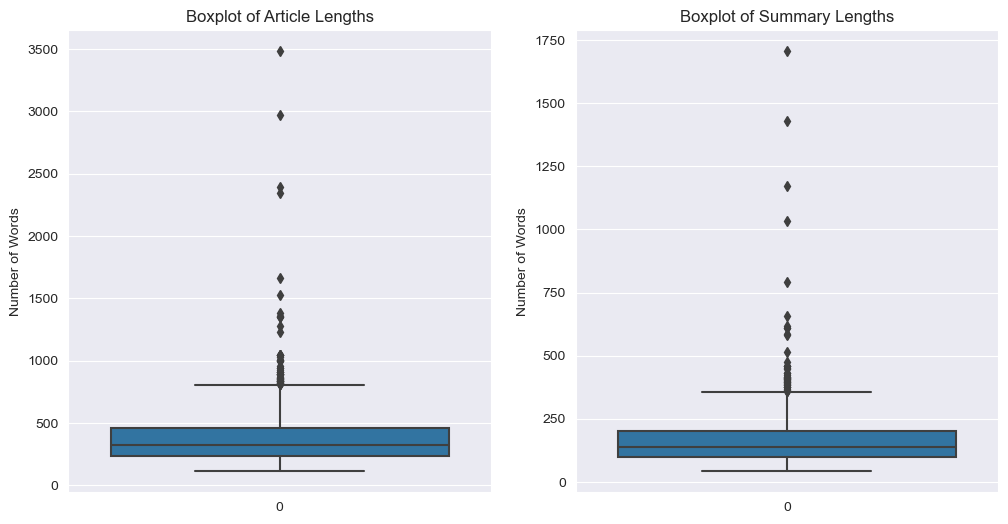

In [13]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot for the articles' number of words
sns.boxplot(training_dataset["article_length"], ax=axes[0])
axes[0].set_ylabel("Number of Words")
axes[0].set_title("Boxplot of Article Lengths")

# Plot for the summaries' number of words
sns.boxplot(training_dataset["summary_length"], ax=axes[1])
axes[1].set_ylabel("Number of Words")
axes[1].set_title("Boxplot of Summary Lengths")


In [14]:
# Get statistics for the articles boxplot
lines_articles = axes[0].lines[:6]
articles_stats = [line.get_ydata()[0] for line in lines_articles]
Q1_articles, Q3_articles, lower_whisker_articles, upper_whisker_articles, median_articles = articles_stats[:5]

# Get statistics for the summaries boxplot
lines_summaries = axes[1].lines[:6]
summaries_stats = [line.get_ydata()[0] for line in lines_summaries]
Q1_summaries, Q3_summaries, lower_whisker_summaries, upper_whisker_summaries, median_summaries = summaries_stats[:5]

In [15]:
training_dataset = training_dataset[(training_dataset['summary_length'] <= upper_whisker_summaries) & (training_dataset['article_length'] <= upper_whisker_articles)]

In [16]:
training_dataset.head()

,filename,newsarticle,summary,article_length,summary_length
0,entertainment_097,Surprise win for anti-Bush film\n\nMichael Moo...,"Moore said it was ""an historic occasion"" that ...",309,138
1,tech_329,Intel unveils laser breakthrough\n\nIntel has ...,While work has been done to make some of the c...,481,219
2,tech_352,Slow start to speedy net services\n\nFaster br...,"For BT Retail, she said, the super-fast servic...",273,130
3,sport_461,Rusedski angry over supplements\n\nGreg Ruseds...,"""You would think they would have been availabl...",305,113
4,tech_074,China 'to overtake US net use'\n\nThe Chinese ...,The net is key to helping Chinese people keep ...,500,203


In [17]:
df = training_dataset

In [20]:
import torch
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import TensorDataset, DataLoader
from transformers import BartTokenizer, BartForConditionalGeneration, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import pandas as pd
from rouge_score import rouge_scorer
from torch.cuda.amp import autocast, GradScaler
from torch.nn.utils import clip_grad_norm_

In [22]:
# Define the device for GPU usage (if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Tokenize and preprocess the text data
tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')
max_length = 512  # Maximum sequence length

def tokenize_text(text):
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=512, truncation=True, padding='max_length', return_attention_mask=True)
    return inputs.to(device)  # Move the tokenized inputs to the GPU

def tokenize_summary(text):
    inputs = tokenizer.encode(text, return_tensors="pt", max_length=280, truncation=True, padding='max_length', return_attention_mask=True)
    return inputs.to(device)  # Move the tokenized summaries to the GPU


df['TokenizedText'] = df['newsarticle'].apply(tokenize_text)
df['TokenizedSummary'] = df['summary'].apply(tokenize_summary)

# Split your data into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Convert tokenized data to PyTorch tensors
X_train = torch.stack([seq.squeeze() for seq in train_df['TokenizedText']])
Y_train = torch.stack([seq.squeeze() for seq in train_df['TokenizedSummary']])
X_test = torch.stack([seq.squeeze() for seq in test_df['TokenizedText']])
Y_test = torch.stack([seq.squeeze() for seq in test_df['TokenizedSummary']])

# Define a DataLoader for batching data
train_dataset = TensorDataset(X_train, Y_train)
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_dataset = TensorDataset(X_test, Y_test)
test_dataloader = DataLoader(test_dataset, batch_size=4)


/var/folders/qd/t1dpxdpn0xj2byx5h2wvvzr80000gn/T/ipykernel_75830/3414705335.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TokenizedText'] = df['newsarticle'].apply(tokenize_text)
/var/folders/qd/t1dpxdpn0xj2byx5h2wvvzr80000gn/T/ipykernel_75830/3414705335.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TokenizedSummary'] = df['summary'].apply(tokenize_summary)


In [23]:
# Define the BART model
model = BartForConditionalGeneration.from_pretrained('facebook/bart-base')

# Create a GradScaler for mixed-precision training
scaler = GradScaler()

# Define hyperparameters
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model.to(device)  # Move the model to the GPU
optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)  
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=50, num_training_steps=len(train_dataloader) * 10)  # Add learning rate scheduler
early_stopping_rounds = 2
best_rouge_score = -1
current_round = 0

# Define gradient accumulation steps
accumulation_steps = 20  # You can adjust this number

def train(model, dataloader, optimizer, scheduler):
    model.train()
    total_loss = 0.0
    optimizer.zero_grad()

    for step, batch in enumerate(tqdm(dataloader, desc="Training")):
        inputs = batch[0].to(device)  # Move the input batch to the GPU
        attention_mask = (inputs != 0).float().to(device)  # Create attention mask
        targets = batch[1].to(device)  # Move the target batch to the GPU

        with autocast():
            outputs = model(input_ids=inputs, attention_mask=attention_mask, decoder_input_ids=targets, labels=targets)
            loss = outputs.loss

        # Perform gradient accumulation
        loss = loss / accumulation_steps
        scaler.scale(loss).backward()

        if (step + 1) % accumulation_steps == 0:
            # Update gradients and optimizer once every accumulation_steps
            clip_grad_norm_(model.parameters(), max_norm=1.0)  # Optional gradient clipping
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad()

        total_loss += loss.item()

    return total_loss / len(dataloader)

def calculate_rouge1_precision(logits, targets):
    scorer = rouge_scorer.RougeScorer(['rouge1'], use_stemmer=True)
    rouge1_precision = 0.0
    num_samples = len(logits)

    for i in range(num_samples):
        predicted_ids = logits[i].cpu().numpy()
        target_ids = targets[i].cpu().numpy()

        # Convert token IDs to strings
        predicted_text = tokenizer.decode(predicted_ids, skip_special_tokens=True)
        target_text = tokenizer.decode(target_ids, skip_special_tokens=True)

        # Calculate ROUGE-1 precision
        scores = scorer.score(predicted_text, target_text)
        rouge1_precision += scores['rouge1'].precision

    return rouge1_precision / num_samples

# Training loop
for epoch in range(2):  # Change the number of epochs as needed
    train_loss = train(model, train_dataloader, optimizer, scheduler)
    print(f"Epoch {epoch+1}/{2}, Train Loss: {train_loss:.4f}")


/Users/kysgattu/anaconda3/lib/python3.11/site-packages/torch/cuda/amp/grad_scaler.py:124: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
/Users/kysgattu/anaconda3/lib/python3.11/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Training:   0%|          | 0/248 [00:00<?, ?it/s]/Users/kysgattu/anaconda3/lib/python3.11/site-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
Training: 100%|██████████| 248/248 [16:24<00:00,  3.97s/it]


Epoch 1/2, Train Loss: 0.6437


Training: 100%|██████████| 248/248 [14:57<00:00,  3.62s/it]

Epoch 2/2, Train Loss: 0.6453


In [26]:
device = torch.device("cpu" if torch.backends.mps.is_available() else "cpu")
print(device)

def evaluate(model, dataloader):
    model.eval()
    
    test_articles = []
    actual_summaries = []
    predicted_summaries = []
    rouge1_precision_scores = []

    scorer = rouge_scorer.RougeScorer(['rouge1'])

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating Test"):
            inputs = batch[0].to(device)
            attention_mask = (inputs != 0).float().to(device)
            targets = batch[1].to(device)
            outputs = model.generate(input_ids=inputs, attention_mask=attention_mask, max_length=150, num_beams=17, length_penalty=2.0, early_stopping=False)
            
            for output, target, input_text in zip(outputs, targets, inputs):
                # Calculate ROUGE-1 precision for each sample
                output_text = tokenizer.decode(output, skip_special_tokens=True)
                target_text = tokenizer.decode(target, skip_special_tokens=True)
                rouge_scores = scorer.score(output_text, target_text)
                rouge1_precision_scores.append(rouge_scores['rouge1'].precision)
                
                # Append tokenized text, actual summaries, and predicted summaries
                test_articles.append(tokenizer.decode(input_text, skip_special_tokens=True))
                actual_summaries.append(target_text)
                predicted_summaries.append(output_text)

    return test_articles, actual_summaries, predicted_summaries, rouge1_precision_scores

# Evaluate the model
test_articles, actual_summaries, predicted_summaries, rouge1_precision_scores = evaluate(model, test_dataloader)

# Create a dictionary with the extracted data
data = {
    'Article': test_articles,
    'Actual Summary': actual_summaries,
    'Predicted Summary': predicted_summaries,
    'ROUGE-1 Precision': rouge1_precision_scores,
}

# Create a Pandas DataFrame from the dictionary
results_df = pd.DataFrame(data)

# Display the DataFrame
pd.set_option('display.max_colwidth', None)
results_df.head(5)

cpu


Evaluating Test: 100%|██████████| 63/63 [38:02<00:00, 36.23s/it]


,Article,Actual Summary,Predicted Summary,ROUGE-1 Precision
0,"summarize: IBM puts cash behind Linux push\n\nIBM is spending $100m (Â£52m) over the next three years beefing up its commitment to Linux software.\n\nThe cash injection will be used to help its customers use Linux on every type of device from handheld computers and phones right up to powerful servers. IBM said the money will fund a variety of technical, research and marketing initiatives to boost Linux use. IBM said it had taken the step in response to greater customer demand for the open source software.\n\nIn 2004 IBM said it had seen double digit growth in the number of customers using Linux to help staff work together more closely. The money will be used to help this push towards greater collaboration and will add Linux-based elements to IBM's Workplace software. Workplace is a suite of programs and tools that allow workers to get at core business applications no matter what device they use to connect to corporate networks. One of the main focuses of the initiative will be to make it easier to use Linux-based desktop computers and mobile devices with Workplace. Even before IBM announced this latest spending boost it was one of the biggest advocates of the open source way of working. In 2001 it put $300m into a three-year Linux program and has produced Linux versions of many of its programs. Linux and the open source software movement are based on the premise that developers should be free to tinker with the core components of software programs. They reason that more open scrutiny of software produces better programs and fuels innovation.\n","IBM said it had taken the step in response to greater customer demand for the open source software.Linux and the open source software movement are based on the premise that developers should be free to tinker with the core components of software programs.IBM is spending $100m (Â£52m) over the next three years beefing up its commitment to Linux software.IBM said the money will fund a variety of technical, research and marketing initiatives to boost Linux use.The cash injection will be used to help its customers use Linux on every type of device from handheld computers and phones right up to powerful servers.","summarize: IBM puts cash behind Linux push in response to greater customer demand for the open source software. “In 2004 IBM said it had seen double digit growth in the number of customers using Linux to help staff work together more closely.The cash injection will be used to help its customers use Linux on every type of device from handheld computers and phones right up to powerful servers. IBM said the money will fund a variety of technical, research and marketing initiatives to boost Linux use. IBM is spending $100m (Â£52m) over the next three years beefing up its commitment to support and will add Linux-based elements to IBM's Workplace software. The money will be spent to help this push towards greater collaboration",0.801887
1,"summarize: Game firm holds 'cast' auditions\n\nVideo game firm Bioware is to hold open auditions for people to become cast members for future games.\n\nThe company, which makes role playing games such as Knights of the Old Republic and Neverwinter Nights, is seeking people aged 18 to 99. The Canada-based company says it was looking for ""a wide variety of people to use as face models for characters"". Everyone chosen to appear in a video game will receive a performer's fee for the use of their image. The company is inviting people to come along to a shopping mall in West Edmonton, Alberta, on Friday and Saturday, bringing along a piece of photo identification.\n\n""There are hundreds and hundreds of characters in a typical Bioware game,"" said Shauna Perry, Bioware's audio and external resources producer. ""Those people live in any city and village and so we need ordinary people, people with interesting faces."" She added: ""Not everyone is a model in the world so we don't want just models